# Reinforcement Learning

# Dynamic programming

This notebook presents policy iteration and value iteration for finding the optimal policy.

Note that these techniques require the enumeration of all states and thus apply to a few models only (e.g., walk, Tic-Tac-Toe, Nim).

In [1]:
import numpy as np
from model import Maze, TicTacToe, Nim
from agent import Agent
from dp import PolicyEvaluation, PolicyIteration, ValueIteration

## Maze

In [2]:
maze_map = np.load('maze.npy')

In [3]:
model = Maze()
init_state = (1, 0)
exit_state = (1, 20)
model.set_parameters(maze_map, init_state, [exit_state])

In [4]:
states = model.get_states()
len(states)

105

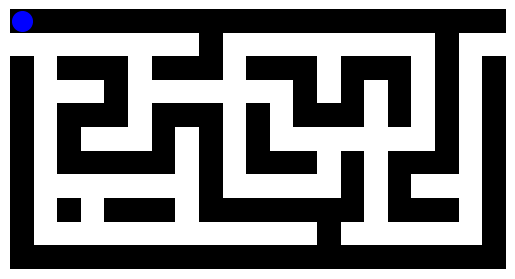

In [5]:
model.display()

## Policy Evaluation

Policy evaluation relies on Bellman's equation.

In [6]:
# let's start with the random policy
agent = Agent(model)

# policy evaluation
algo = PolicyEvaluation(model, agent.policy)
values = algo.get_values()
len(values)

105

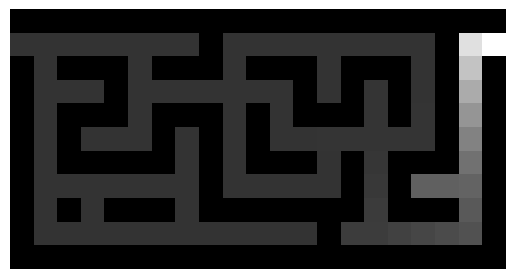

In [7]:
model.display_values(values)

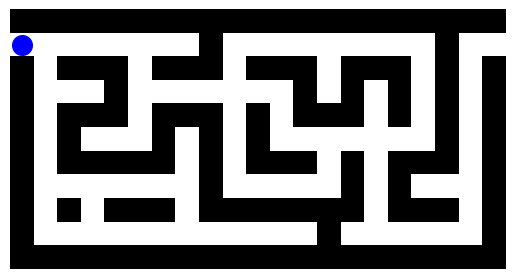

In [8]:
stop, states, rewards = agent.get_episode()
animation = model.display(states)
animation

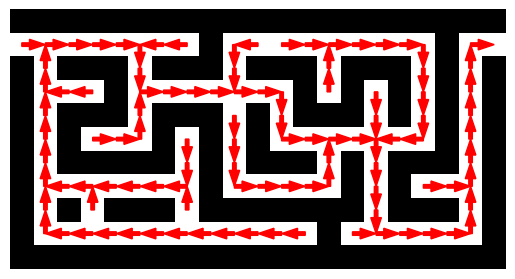

In [9]:
# policy improvement
new_policy = algo.improve_policy()
model.display_policy(new_policy)

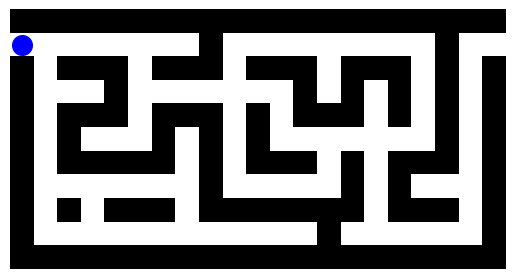

In [10]:
# let's test this new policy
agent = Agent(model, new_policy)
stop, states, rewards = agent.get_episode()
animation = model.display(states)
animation

## Policy Iteration

In general, several iterations of policy evaluation / policy improvement are necessary. Below is the Policy Iteration method.

Convergence after 16 iterations.


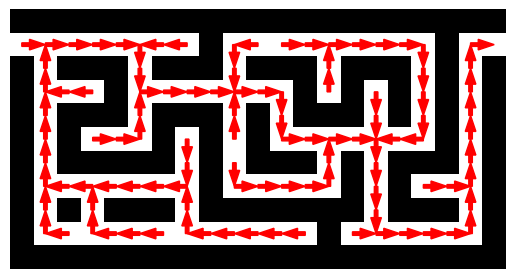

In [11]:
algo = PolicyIteration(model, n_iter_eval=1000)
policy = algo.get_optimal_policy()
model.display_policy(policy)

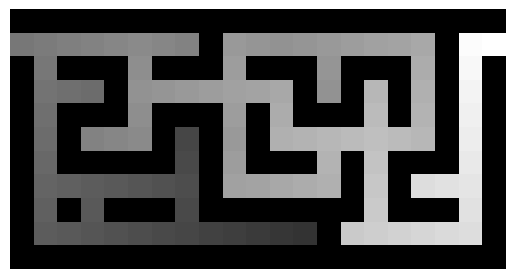

In [12]:
values = algo.values
model.display_values(values)

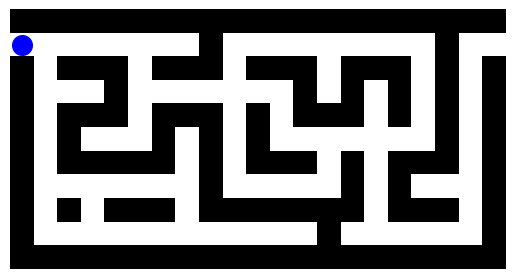

In [13]:
stop, states, rewards = agent.get_episode()
animation = model.display(states)
animation

## Value Iteration

Value iteration relies on Bellman's optimality equation. 

## To do

Check the code of ``ValueIteration``.
* Complete the method ``get_optimal_policy`` and test it on the maze.
* Complete the method ``get_optimal_policy_game`` and test it on the Tic-Tac-Toe. Note that both the player and the adversary are optimized.

### Maze

Convergence after 55 iterations.


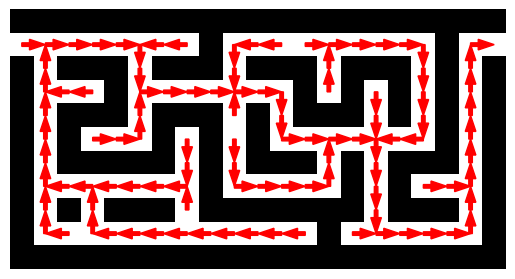

In [14]:
algo = ValueIteration(model)
policy = algo.get_optimal_policy()
model.display_policy(policy)

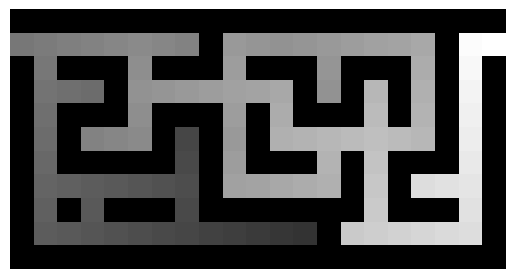

In [15]:
values = algo.values
model.display_values(values)

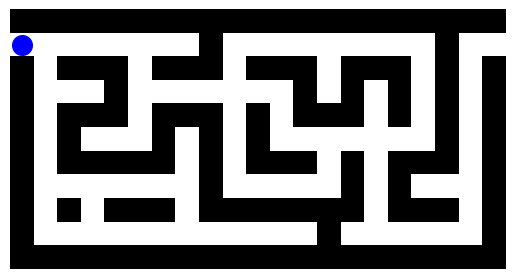

In [16]:
stop, states, rewards = agent.get_episode()
animation = model.display(states)
animation

### TicTacToe

In [5]:
game = TicTacToe(play_first=False)
agent = Agent(game)
algo = PolicyIteration(game, n_iter_eval=1000)
policy = algo.get_optimal_policy()

IndexError: list index out of range

In [2]:
game = TicTacToe()
agent = Agent(game)
algo = PolicyEvaluation(game, agent.policy)
values = algo.evaluate_policy()

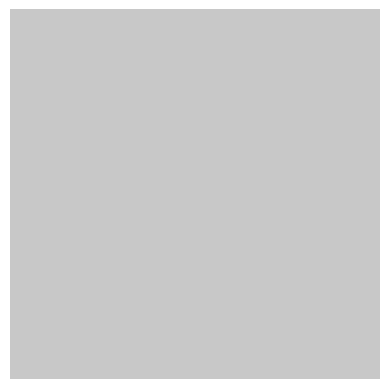

In [3]:
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

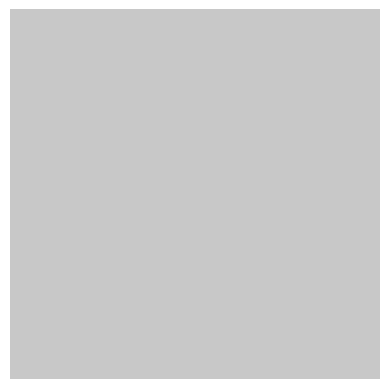

In [19]:
# policy improvement
new_policy = algo.improve_policy()

# let's test this new policy
agent = Agent(game, new_policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

so far so good

In [20]:
algo = PolicyIteration(game, n_iter_eval=1000)
policy = algo.get_optimal_policy()
game.display_policy(policy)

IndexError: list index out of range

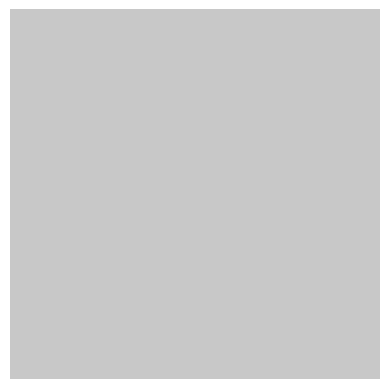

In [ ]:
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

(5890,)
(5890, 5890)
Convergence after 6 iterations.


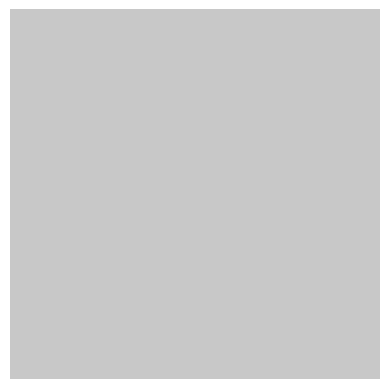

In [ ]:
algo = ValueIteration(game)
policy = algo.get_optimal_policy_game()
# let's test this new policy
agent = Agent(game, policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

## Questions

* What is the outcome of Tic-Tac-Toe with perfect players?
* Display a typical game against two perfect players.
* What is the outcome of Tic-Tac-Toe for a perfect player against a random player?
* Do the same for Nim.

### TicTacToe

In [ ]:
Game = TicTacToe
# first player
game = Game()
algo = ValueIteration(game)
policy = algo.get_optimal_policy_game()

(5890,)
(5890, 5890)
Convergence after 6 iterations.


In [ ]:
# adversary
game = Game(play_first=False, player=-1)
algo = ValueIteration(game)
adversary_policy = algo.get_optimal_policy_game()

(5890,)
(5890, 5890)
Convergence after 6 iterations.


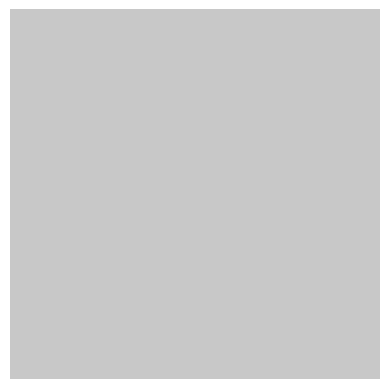

In [ ]:
# playing together 
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Always tie

### Nim

In [ ]:
Game = Nim
# first player
game = Game()
algo = ValueIteration(game)
policy = algo.get_optimal_policy_game()

Convergence after 16 iterations.


In [ ]:
# adversary
game = Game(play_first=False, player=-1)
algo = ValueIteration(game)
adversary_policy = algo.get_optimal_policy_game()

Convergence after 16 iterations.


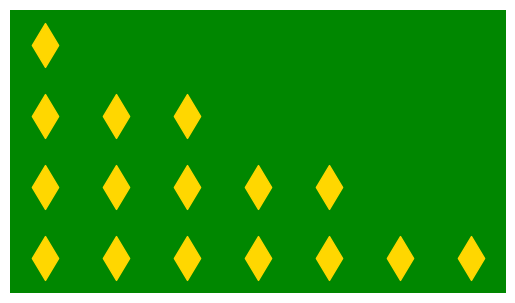

In [ ]:
# playing together 
game = Game(adversary_policy=adversary_policy)
agent = Agent(game, policy=policy)
stop, states, rewards = agent.get_episode()
animation = game.display(states)
animation

In [ ]:
rewards

[0, 0, 0, 0, 0, 0, 0, 0, 0, -1]

Computer always wins